Estructura tensorial del lenguaje. Cada plano (tiempo verbal, lexema, pronombres) es una dimensión independiente, y cada palabra específica es la intersección única de esos planos.
Matemáticamente, esto se formaliza como:
Palabra = Lexema ⊗ Tiempo ⊗ Persona ⊗ Aspecto ⊗ Modo
Donde ⊗ es el producto tensorial.
Por ejemplo, "corrías":

Plano lexical: "correr"
Plano temporal: "pasado"
Plano pronominal: "tú"
Plano aspectual: "imperfectivo"
Explica por qué se puede generar automáticamente formas que nunca hemos escuchado. Al saber que:

correr + pasado + yo = "corrí"
comer + pasado + yo = "comí"

Inmediatamente se infiere que:

saltar + pasado + yo = "salté"

Esto es composicionalidad sistemática - exactamente lo que falta en los modelos actuales de IA que tratan cada palabra como un vector independiente.
A través de este enfoque se puede reducir drásticamente la complejidad: en lugar de memorizar 1,080,000 formas verbales del español por separado, el sistema aprendería ~10,000 verbos base + 3 tiempos + 6 personas + algunos aspectos = unas 10,020 unidades base que se combinan sistemáticamente.
Este prototipo demuestra cómo funciona la representación de palabras como intersecciones de planos geométricos.
Características principales del modelo:
1. Estructura Tensorial

Cada plano (lexical, temporal, pronominal, etc.) tiene su propio espacio de embeddings
Las palabras se forman como intersecciones de estos planos
Operaciones sistemáticas entre componentes gramaticales

2. Capacidades Implementadas

Análisis morfológico: Descompone palabras en sus componentes
Generación sistemática: Crea nuevas formas desde componentes
Transformaciones: Cambia tiempo/persona manteniendo otros aspectos
Similaridad semántica: Basada en la estructura tensorial

3. Eficiencia Demostrada
El modelo muestra una reducción masiva de parámetros:

Modelo tradicional: ~1.8 millones de parámetros
Modelo tensorial: ~400 parámetros
Reducción de 4,500x en complejidad Próximos pasos para expandir el modelo:

Añadir más verbos y conjugaciones
Implementar sustantivos con género/número
Agregar sintaxis (estructuras de frases)
Entrenamiento con datos reales
Optimización de las operaciones tensoriales

En este modelo una palabra = plano1 x plano2 x plano3 x plano n.

Sustantivos: raíz x género x número x tamaño
Verbos: raíz x tiempo x persona x aspecto x modo
Adjetivos: cualidad x género x número x grado x tamaño

Por ejemplo, "casitas" = casa x femenino x plural x diminutivo
El modelo también resuelve el problema de eficiencia: en lugar de memorizar 2,000,000 formas verbales independientemente, necesitamos solo ~50,000 raíces + unos 20 morfemas = reducción de 40,000x en parámetros.


In [3]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
from typing import Dict, List, Tuple
import json
import re
from datetime import datetime

# Importar nuestro analizador tensorial (asumiendo que está disponible)
# Si no, incluimos una versión simplificada aquí

class AnalizadorCorpusTensorial:
    """
    Analizador completo de corpus usando el modelo tensorial.
    Procesa múltiples archivos y genera estadísticas comprensivas.
    """

    def __init__(self, ruta_corpus: str):
        self.ruta_corpus = ruta_corpus
        self.resultados_totales = {}
        self.estadisticas_globales = {}
        self.matriz_coocurrencia = defaultdict(lambda: defaultdict(int))

        # Base de datos morfológica expandida para análisis real
        self.planos = {
            'raiz': self._cargar_verbos_comunes(),
            'tiempo': ['presente', 'pasado', 'futuro', 'condicional', 'presente_perfecto', 'pasado_perfecto'],
            'persona': ['1sg', '2sg', '3sg', '1pl', '2pl', '3pl'],
            'modo': ['indicativo', 'subjuntivo', 'imperativo'],
            'aspecto': ['perfectivo', 'imperfectivo', 'progresivo'],
            'genero': ['masculino', 'femenino', 'neutro'],
            'numero': ['singular', 'plural'],
            'categoria': ['verbo', 'sustantivo', 'adjetivo', 'adverbio', 'preposicion', 'articulo', 'pronombre', 'conjuncion']
        }

        # Base de datos de palabras (ampliada para análisis real)
        self.palabras_conocidas = self._crear_base_datos_completa()
        self.indices = {plano: {elem: i for i, elem in enumerate(elementos)}
                       for plano, elementos in self.planos.items()}

    def _cargar_verbos_comunes(self):
        """Carga una lista extensa de verbos españoles comunes"""
        return [
            'ser', 'estar', 'tener', 'hacer', 'decir', 'ir', 'ver', 'dar', 'saber', 'querer',
            'llegar', 'pasar', 'deber', 'poner', 'parecer', 'quedar', 'creer', 'hablar', 'llevar',
            'dejar', 'seguir', 'encontrar', 'llamar', 'venir', 'pensar', 'salir', 'volver', 'tomar',
            'conocer', 'vivir', 'sentir', 'tratar', 'mirar', 'contar', 'empezar', 'esperar',
            'buscar', 'existir', 'entrar', 'trabajar', 'escribir', 'perder', 'producir', 'ocurrir',
            'permitir', 'aparecer', 'considerar', 'conseguir', 'comenzar', 'servir', 'sacar', 'necesitar',
            'mantener', 'resultar', 'leer', 'caer', 'cambiar', 'presentar', 'crear', 'abrir', 'considerar',
            'oír', 'acabar', 'convertir', 'ganar', 'formar', 'traer', 'partir', 'morir', 'aceptar',
            'realizar', 'suponer', 'comprender', 'lograr', 'explicar', 'preguntar', 'tocar', 'reconocer',
            'estudiar', 'alcanzar', 'nacer', 'dirigir', 'correr', 'utilizar', 'pagar', 'ayudar',
            'gustar', 'jugar', 'escuchar', 'cumplir', 'ofrecer', 'descubrir', 'levantar', 'intentar'
        ]

    def _crear_base_datos_completa(self):
        """Crea una base de datos más completa para análisis real del corpus"""
        palabras = {}

        # Verbos con conjugaciones más completas
        conjugaciones_verbos = {
            # SER
            'es': {'raiz': 'ser', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'son': {'raiz': 'ser', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'era': {'raiz': 'ser', 'tiempo': 'pasado', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'fueron': {'raiz': 'ser', 'tiempo': 'pasado', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'será': {'raiz': 'ser', 'tiempo': 'futuro', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'serán': {'raiz': 'ser', 'tiempo': 'futuro', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},

            # ESTAR
            'está': {'raiz': 'estar', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'están': {'raiz': 'estar', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'estaba': {'raiz': 'estar', 'tiempo': 'pasado', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'estaban': {'raiz': 'estar', 'tiempo': 'pasado', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'estará': {'raiz': 'estar', 'tiempo': 'futuro', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},

            # TENER
            'tiene': {'raiz': 'tener', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'tienen': {'raiz': 'tener', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'tenía': {'raiz': 'tener', 'tiempo': 'pasado', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'tenían': {'raiz': 'tener', 'tiempo': 'pasado', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'tendrá': {'raiz': 'tener', 'tiempo': 'futuro', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},

            # HACER
            'hace': {'raiz': 'hacer', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'hacen': {'raiz': 'hacer', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'hizo': {'raiz': 'hacer', 'tiempo': 'pasado', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'hicieron': {'raiz': 'hacer', 'tiempo': 'pasado', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},

            # DECIR
            'dice': {'raiz': 'decir', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'dicen': {'raiz': 'decir', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'dijo': {'raiz': 'decir', 'tiempo': 'pasado', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'dijeron': {'raiz': 'decir', 'tiempo': 'pasado', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},

            # IR
            'va': {'raiz': 'ir', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'van': {'raiz': 'ir', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'fue': {'raiz': 'ir', 'tiempo': 'pasado', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'fueron': {'raiz': 'ir', 'tiempo': 'pasado', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},

            # Más verbos comunes
            'puede': {'raiz': 'poder', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'pueden': {'raiz': 'poder', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'debe': {'raiz': 'deber', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'deben': {'raiz': 'deber', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'quiere': {'raiz': 'querer', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'quieren': {'raiz': 'querer', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
        }

        # Sustantivos con variaciones de género y número
        sustantivos = {
            # Familia 'niño'
            'niño': {'raiz': 'niño', 'genero': 'masculino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'niños': {'raiz': 'niño', 'genero': 'masculino', 'numero': 'plural', 'categoria': 'sustantivo'},
            'niña': {'raiz': 'niño', 'genero': 'femenino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'niñas': {'raiz': 'niño', 'genero': 'femenino', 'numero': 'plural', 'categoria': 'sustantivo'},

            # Familia 'casa'
            'casa': {'raiz': 'casa', 'genero': 'femenino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'casas': {'raiz': 'casa', 'genero': 'femenino', 'numero': 'plural', 'categoria': 'sustantivo'},

            # Más sustantivos
            'hombre': {'raiz': 'hombre', 'genero': 'masculino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'hombres': {'raiz': 'hombre', 'genero': 'masculino', 'numero': 'plural', 'categoria': 'sustantivo'},
            'mujer': {'raiz': 'mujer', 'genero': 'femenino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'mujeres': {'raiz': 'mujer', 'genero': 'femenino', 'numero': 'plural', 'categoria': 'sustantivo'},
            'país': {'raiz': 'país', 'genero': 'masculino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'países': {'raiz': 'país', 'genero': 'masculino', 'numero': 'plural', 'categoria': 'sustantivo'},
            'ciudad': {'raiz': 'ciudad', 'genero': 'femenino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'ciudades': {'raiz': 'ciudad', 'genero': 'femenino', 'numero': 'plural', 'categoria': 'sustantivo'},
            'año': {'raiz': 'año', 'genero': 'masculino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'años': {'raiz': 'año', 'genero': 'masculino', 'numero': 'plural', 'categoria': 'sustantivo'},
            'día': {'raiz': 'día', 'genero': 'masculino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'días': {'raiz': 'día', 'genero': 'masculino', 'numero': 'plural', 'categoria': 'sustantivo'},
        }

        # Artículos y determinantes
        articulos = {
            'el': {'categoria': 'articulo', 'genero': 'masculino', 'numero': 'singular'},
            'la': {'categoria': 'articulo', 'genero': 'femenino', 'numero': 'singular'},
            'los': {'categoria': 'articulo', 'genero': 'masculino', 'numero': 'plural'},
            'las': {'categoria': 'articulo', 'genero': 'femenino', 'numero': 'plural'},
            'un': {'categoria': 'articulo', 'genero': 'masculino', 'numero': 'singular'},
            'una': {'categoria': 'articulo', 'genero': 'femenino', 'numero': 'singular'},
            'unos': {'categoria': 'articulo', 'genero': 'masculino', 'numero': 'plural'},
            'unas': {'categoria': 'articulo', 'genero': 'femenino', 'numero': 'plural'},
            'este': {'categoria': 'articulo', 'genero': 'masculino', 'numero': 'singular'},
            'esta': {'categoria': 'articulo', 'genero': 'femenino', 'numero': 'singular'},
            'estos': {'categoria': 'articulo', 'genero': 'masculino', 'numero': 'plural'},
            'estas': {'categoria': 'articulo', 'genero': 'femenino', 'numero': 'plural'},
        }

        # Preposiciones y conectores
        funcionales = {
            'de': {'categoria': 'preposicion'},
            'en': {'categoria': 'preposicion'},
            'con': {'categoria': 'preposicion'},
            'por': {'categoria': 'preposicion'},
            'para': {'categoria': 'preposicion'},
            'sin': {'categoria': 'preposicion'},
            'sobre': {'categoria': 'preposicion'},
            'entre': {'categoria': 'preposicion'},
            'hacia': {'categoria': 'preposicion'},
            'desde': {'categoria': 'preposicion'},
            'hasta': {'categoria': 'preposicion'},
            'y': {'categoria': 'conjuncion'},
            'o': {'categoria': 'conjuncion'},
            'pero': {'categoria': 'conjuncion'},
            'que': {'categoria': 'pronombre'},
            'se': {'categoria': 'pronombre'},
            'le': {'categoria': 'pronombre'},
            'lo': {'categoria': 'pronombre'},
            'me': {'categoria': 'pronombre'},
            'te': {'categoria': 'pronombre'},
            'nos': {'categoria': 'pronombre'},
        }

        # Combinar todas las categorías
        palabras.update(conjugaciones_verbos)
        palabras.update(sustantivos)
        palabras.update(articulos)
        palabras.update(funcionales)

        return palabras

    def listar_archivos(self) -> List[str]:
        """Lista todos los archivos de texto en el directorio del corpus"""
        if not os.path.exists(self.ruta_corpus):
            print(f"❌ ERROR: La ruta {self.ruta_corpus} no existe.")
            print("🔧 SOLUCIÓN: Monta tu Google Drive primero:")
            print("   from google.colab import drive")
            print("   drive.mount('/content/drive')")
            return []

        # Buscar archivos de texto
        patrones = ['*.txt', '*.csv', '*.json']
        archivos = []

        for patron in patrones:
            ruta_patron = os.path.join(self.ruta_corpus, patron)
            archivos.extend(glob.glob(ruta_patron))

        # También buscar en subdirectorios
        for root, dirs, files in os.walk(self.ruta_corpus):
            for file in files:
                if file.endswith(('.txt', '.csv', '.json')):
                    archivos.append(os.path.join(root, file))

        archivos = list(set(archivos))  # Eliminar duplicados
        print(f"📁 Encontrados {len(archivos)} archivos en el corpus")

        return archivos

    def leer_archivo(self, ruta_archivo: str) -> str:
        """Lee el contenido de un archivo"""
        try:
            with open(ruta_archivo, 'r', encoding='utf-8') as f:
                contenido = f.read()
            return contenido
        except Exception as e:
            print(f"⚠️  Error leyendo {ruta_archivo}: {e}")
            return ""

    def procesar_archivo(self, ruta_archivo: str) -> Dict:
        """Procesa un archivo individual usando análisis tensorial"""
        print(f"📄 Procesando: {os.path.basename(ruta_archivo)}")

        contenido = self.leer_archivo(ruta_archivo)
        if not contenido:
            return {'error': 'No se pudo leer el archivo'}

        # Preprocesar texto
        texto_limpio = self.limpiar_texto(contenido)
        tokens = texto_limpio.split()

        # Analizar cada token
        palabras_analizadas = []
        palabras_reconocidas = 0

        for token in tokens:
            analisis = self.analizar_palabra(token)
            palabras_analizadas.append(analisis)
            if analisis['reconocida']:
                palabras_reconocidas += 1

        # Calcular estadísticas del archivo
        estadisticas = self._calcular_estadisticas_archivo(palabras_analizadas)
        patrones = self._identificar_patrones_archivo(palabras_analizadas)
        complejidad = self._calcular_complejidad_archivo(palabras_analizadas)

        resultado = {
            'archivo': os.path.basename(ruta_archivo),
            'ruta_completa': ruta_archivo,
            'total_tokens': len(tokens),
            'tokens_reconocidos': palabras_reconocidas,
            'cobertura': palabras_reconocidas / len(tokens) if tokens else 0,
            'estadisticas': estadisticas,
            'patrones': patrones,
            'complejidad': complejidad,
            'palabras_analizadas': palabras_analizadas
        }

        return resultado

    def limpiar_texto(self, texto: str) -> str:
        """Limpia y normaliza el texto"""
        # Convertir a minúsculas
        texto = texto.lower()
        # Remover caracteres especiales pero mantener espacios
        texto = re.sub(r'[^\w\s]', ' ', texto)
        # Normalizar espacios
        texto = re.sub(r'\s+', ' ', texto)
        return texto.strip()

    def analizar_palabra(self, palabra: str) -> Dict:
        """Analiza una palabra usando el modelo tensorial"""
        if palabra in self.palabras_conocidas:
            componentes = self.palabras_conocidas[palabra]

            # Convertir a coordenadas tensoriales
            coordenadas = {}
            for plano, valor in componentes.items():
                if plano in self.indices and valor in self.indices[plano]:
                    coordenadas[plano] = self.indices[plano][valor]

            return {
                'palabra': palabra,
                'reconocida': True,
                'componentes': componentes,
                'coordenadas': coordenadas,
                'codigo_tensorial': hash(str(sorted(coordenadas.items())))
            }
        else:
            return {
                'palabra': palabra,
                'reconocida': False,
                'componentes': {},
                'coordenadas': {},
                'codigo_tensorial': None
            }

    def _calcular_estadisticas_archivo(self, palabras_analizadas: List[Dict]) -> Dict:
        """Calcula estadísticas tensoriales de un archivo"""
        stats = {
            'distribucion_categorias': Counter(),
            'distribucion_tiempos': Counter(),
            'distribucion_personas': Counter(),
            'distribucion_generos': Counter(),
            'distribucion_numeros': Counter(),
            'raices_frecuentes': Counter(),
            'familias_morfologicas': defaultdict(list)
        }

        for analisis in palabras_analizadas:
            if analisis['reconocida']:
                comp = analisis['componentes']

                # Contar distribuciones
                for caracteristica in ['categoria', 'tiempo', 'persona', 'genero', 'numero']:
                    if caracteristica in comp:
                        stats[f'distribucion_{caracteristica}s'][comp[caracteristica]] += 1

                # Raíces frecuentes
                if 'raiz' in comp:
                    stats['raices_frecuentes'][comp['raiz']] += 1
                    stats['familias_morfologicas'][comp['raiz']].append(analisis['palabra'])

        return stats

    def _identificar_patrones_archivo(self, palabras_analizadas: List[Dict]) -> Dict:
        """Identifica patrones tensoriales en el archivo"""
        patrones = {
            'transformaciones_detectadas': [],
            'clusters_semanticos': defaultdict(list),
            'secuencias_gramaticales': []
        }

        # Agrupar por raíz para detectar transformaciones
        familias = defaultdict(list)
        for analisis in palabras_analizadas:
            if analisis['reconocida'] and 'raiz' in analisis['componentes']:
                raiz = analisis['componentes']['raiz']
                familias[raiz].append(analisis)

        # Detectar transformaciones sistemáticas
        for raiz, formas in familias.items():
            if len(formas) > 1:
                transformacion = {
                    'raiz': raiz,
                    'formas_detectadas': [f['palabra'] for f in formas],
                    'variaciones': {}
                }

                # Analizar qué varía entre las formas
                for caracteristica in ['tiempo', 'persona', 'genero', 'numero']:
                    valores = [f['componentes'].get(caracteristica) for f in formas if caracteristica in f['componentes']]
                    if len(set(valores)) > 1:  # Si hay variación
                        transformacion['variaciones'][caracteristica] = list(set(valores))

                patrones['transformaciones_detectadas'].append(transformacion)

        return patrones

    def _calcular_complejidad_archivo(self, palabras_analizadas: List[Dict]) -> Dict:
        """Calcula métricas de complejidad morfológica del archivo"""
        palabras_reconocidas = [p for p in palabras_analizadas if p['reconocida']]

        if not palabras_reconocidas:
            return {'complejidad_promedio': 0, 'diversidad_morfologica': 0}

        complejidades = []
        rasgos_unicos = set()

        for analisis in palabras_reconocidas:
            comp = analisis['componentes']
            complejidad_palabra = len([v for k, v in comp.items() if k != 'categoria'])
            complejidades.append(complejidad_palabra)

            # Contar rasgos únicos
            for caracteristica, valor in comp.items():
                if caracteristica != 'categoria':
                    rasgos_unicos.add(f"{caracteristica}:{valor}")

        return {
            'complejidad_promedio': np.mean(complejidades) if complejidades else 0,
            'complejidad_maxima': max(complejidades) if complejidades else 0,
            'diversidad_morfologica': len(rasgos_unicos),
            'distribucion_complejidad': Counter(complejidades)
        }

    def procesar_corpus_completo(self) -> Dict:
        """
        FUNCIÓN PRINCIPAL: Procesa todo el corpus y genera análisis completo
        """
        print("🚀 INICIANDO ANÁLISIS COMPLETO DEL CORPUS")
        print("="*80)

        archivos = self.listar_archivos()
        if not archivos:
            return {'error': 'No se encontraron archivos para procesar'}

        resultados_archivos = []
        estadisticas_globales = {
            'total_archivos': len(archivos),
            'total_tokens': 0,
            'total_reconocidos': 0,
            'distribucion_categorias_global': Counter(),
            'raices_mas_frecuentes_global': Counter(),
            'familias_morfologicas_global': defaultdict(set),
            'archivos_procesados': 0,
            'archivos_con_error': 0
        }

        # Procesar cada archivo
        for i, archivo in enumerate(archivos, 1):
            print(f"\n📁 Archivo {i}/{len(archivos)}: {os.path.basename(archivo)}")

            try:
                resultado = self.procesar_archivo(archivo)

                if 'error' not in resultado:
                    resultados_archivos.append(resultado)
                    estadisticas_globales['archivos_procesados'] += 1

                    # Acumular estadísticas globales
                    estadisticas_globales['total_tokens'] += resultado['total_tokens']
                    estadisticas_globales['total_reconocidos'] += resultado['tokens_reconocidos']

                    # Acumular distribuciones
                    for cat, count in resultado['estadisticas']['distribucion_categorias'].items():
                        estadisticas_globales['distribucion_categorias_global'][cat] += count

                    for raiz, count in resultado['estadisticas']['raices_frecuentes'].items():
                        estadisticas_globales['raices_mas_frecuentes_global'][raiz] += count

                    # Acumular familias morfológicas
                    for raiz, formas in resultado['estadisticas']['familias_morfologicas'].items():
                        estadisticas_globales['familias_morfologicas_global'][raiz].update(formas)

                    print(f"   ✅ Procesado: {resultado['total_tokens']} tokens, {resultado['cobertura']:.1%} reconocidos")

                else:
                    estadisticas_globales['archivos_con_error'] += 1
                    print(f"   ❌ Error: {resultado['error']}")

            except Exception as e:
                estadisticas_globales['archivos_con_error'] += 1
                print(f"   💥 Error crítico: {e}")

        # Calcular métricas globales
        cobertura_global = (estadisticas_globales['total_reconocidos'] /
                           estadisticas_globales['total_tokens']) if estadisticas_globales['total_tokens'] > 0 else 0

        estadisticas_globales['cobertura_global'] = cobertura_global

        resultado_final = {
            'timestamp': datetime.now().isoformat(),
            'corpus_path': self.ruta_corpus,
            'resumen': estadisticas_globales,
            'resultados_por_archivo': resultados_archivos,
            'analisis_global': self._generar_analisis_global(estadisticas_globales, resultados_archivos)
        }

        return resultado_final

    def _generar_analisis_global(self, stats_globales: Dict, resultados_archivos: List[Dict]) -> Dict:
        """Genera análisis de patrones globales del corpus"""
        analisis = {
            'patrones_morfologicos_dominantes': {},
            'diversidad_lexical': 0,
            'complejidad_morfologica_promedio': 0,
            'distribucion_complejidad_archivos': [],
            'familias_morfologicas_mas_ricas': {}
        }

        # Patrones morfológicos dominantes
        if stats_globales['distribucion_categorias_global']:
            total_palabras = sum(stats_globales['distribucion_categorias_global'].values())
            analisis['patrones_morfologicos_dominantes'] = {
                cat: {'frecuencia': count, 'porcentaje': count/total_palabras*100}
                for cat, count in stats_globales['distribucion_categorias_global'].most_common()
            }

        # Diversidad léxical
        analisis['diversidad_lexical'] = len(stats_globales['raices_mas_frecuentes_global'])

        # Complejidad morfológica promedio
        if resultados_archivos:
            complejidades = [r['complejidad']['complejidad_promedio'] for r in resultados_archivos if 'complejidad' in r]
            analisis['complejidad_morfologica_promedio'] = np.mean(complejidades) if complejidades else 0
            analisis['distribucion_complejidad_archivos'] = complejidades

        # Familias morfológicas más ricas
        familias_ricas = {}
        for raiz, formas in stats_globales['familias_morfologicas_global'].items():
            if len(formas) > 1:
                familias_ricas[raiz] = {
                    'total_formas': len(formas),
                    'formas': list(formas),
                    'frecuencia_total': stats_globales['raices_mas_frecuentes_global'][raiz]
                }

        # Ordenar por riqueza morfológica
        analisis['familias_morfologicas_mas_ricas'] = dict(
            sorted(familias_ricas.items(),
                   key=lambda x: x[1]['total_formas'],
                   reverse=True)[:10]
        )

        return analisis

    def generar_reporte_completo(self, resultados: Dict, guardar_archivo: bool = True) -> str:
        """
        Genera un reporte completo del análisis del corpus
        """
        reporte = []
        reporte.append("📊 REPORTE DE ANÁLISIS TENSORIAL DEL CORPUS")
        reporte.append("="*80)
        reporte.append(f"Fecha: {resultados['timestamp']}")
        reporte.append(f"Corpus: {resultados['corpus_path']}")
        reporte.append("")

        # RESUMEN EJECUTIVO
        resumen = resultados['resumen']
        reporte.append("📋 RESUMEN EJECUTIVO")
        reporte.append("-" * 40)
        reporte.append(f"Total de archivos encontrados: {resumen['total_archivos']}")
        reporte.append(f"Archivos procesados exitosamente: {resumen['archivos_procesados']}")
        reporte.append(f"Archivos con errores: {resumen['archivos_con_error']}")
        reporte.append(f"Total de tokens analizados: {resumen['total_tokens']:,}")
        reporte.append(f"Tokens reconocidos por el modelo: {resumen['total_reconocidos']:,}")
        reporte.append(f"Cobertura global del modelo: {resumen['cobertura_global']:.1%}")
        reporte.append("")

        # ANÁLISIS MORFOLÓGICO GLOBAL
        if 'analisis_global' in resultados:
            analisis = resultados['analisis_global']
            reporte.append("🔍 ANÁLISIS MORFOLÓGICO GLOBAL")
            reporte.append("-" * 40)

            if analisis['patrones_morfologicos_dominantes']:
                reporte.append("Categorías gramaticales más frecuentes:")
                for cat, info in list(analisis['patrones_morfologicos_dominantes'].items())[:5]:
                    reporte.append(f"  • {cat}: {info['frecuencia']:,} ({info['porcentaje']:.1f}%)")

            reporte.append(f"Diversidad léxica: {analisis['diversidad_lexical']} raíces únicas")
            reporte.append(f"Complejidad morfológica promedio: {analisis['complejidad_morfologica_promedio']:.2f}")
            reporte.append("")

            if analisis['familias_morfologicas_mas_ricas']:
                reporte.append("Familias morfológicas más ricas:")
                for raiz, info in list(analisis['familias_morfologicas_mas_ricas'].items())[:5]:
                    reporte.append(f"  • {raiz}: {info['total_formas']} formas → {', '.join(list(info['formas'])[:5])}")

        # ESTADÍSTICAS POR ARCHIVO
        if resultados['resultados_por_archivo']:
            reporte.append("")
            reporte.append("📁 ANÁLISIS POR ARCHIVO")
            reporte.append("-" * 40)

            for resultado_archivo in resultados['resultados_por_archivo'][:10]:  # Solo primeros 10
                reporte.append(f"\n📄 {resultado_archivo['archivo']}")
                reporte.append(f"   Tokens: {resultado_archivo['total_tokens']:,}")
                reporte.append(f"   Cobertura: {resultado_archivo['cobertura']:.1%}")

                if resultado_archivo['estadisticas']['distribucion_categorias']:
                    cats = ", ".join([f"{cat}:{count}"
                                    for cat, count in
                                    resultado_archivo['estadisticas']['distribucion_categorias'].most_common(3)])
                    reporte.append(f"   Categorías: {cats}")

                if resultado_archivo['patrones']['transformaciones_detectadas']:
                    n_trans = len(resultado_archivo['patrones']['transformaciones_detectadas'])
                    reporte.append(f"   Transformaciones detectadas: {n_trans}")

        # CONCLUSIONES DEL MODELO TENSORIAL
        reporte.append("")
        reporte.append("🎯 EVALUACIÓN DEL MODELO TENSORIAL")
        reporte.append("-" * 40)

        cobertura = resumen['cobertura_global']
        if cobertura > 0.7:
            reporte.append("✅ EXCELENTE: El modelo tensorial muestra alta cobertura")
        elif cobertura > 0.5:
            reporte.append("✅ BUENO: El modelo tensorial muestra cobertura aceptable")
        elif cobertura > 0.3:
            reporte.append("⚠️  REGULAR: El modelo necesita expansión de vocabulario")
        else:
            reporte.append("❌ BAJO: El modelo requiere mayor cobertura léxica")

        reporte.append(f"Efectividad del análisis morfológico: {cobertura:.1%}")

        if 'analisis_global' in resultados:
            diversidad = analisis['diversidad_lexical']
            reporte.append(f"Capacidad de detección de patrones: {diversidad} familias morfológicas")

            if analisis['familias_morfologicas_mas_ricas']:
                n_familias = len(analisis['familias_morfologicas_mas_ricas'])
                reporte.append(f"Familias morfológicas ricas detectadas: {n_familias}")

        reporte.append("")
        reporte.append("💡 RECOMENDACIONES:")
        if cobertura < 0.5:
            reporte.append("• Expandir base de datos de palabras conocidas")
            reporte.append("• Añadir más conjugaciones verbales")
            reporte.append("• Incluir más variaciones de género/número")

        reporte.append("• Implementar reconocimiento de patrones morfológicos")
        reporte.append("• Añadir análisis sintáctico para frases completas")
        reporte.append("• Desarrollar métricas de coherencia textual")

        texto_reporte = "\n".join(reporte)

        # Guardar archivo si se solicita
        if guardar_archivo:
            nombre_archivo = f"reporte_analisis_tensorial_{datetime.now().strftime('%Y%m%d_%H%M%S')}.txt"
            try:
                with open(nombre_archivo, 'w', encoding='utf-8') as f:
                    f.write(texto_reporte)
                print(f"📁 Reporte guardado en: {nombre_archivo}")
            except:
                print("⚠️  No se pudo guardar el archivo de reporte")

        return texto_reporte

    def mostrar_visualizaciones(self, resultados: Dict):
        """
        Crea visualizaciones de los resultados del análisis
        """
        try:
            import matplotlib.pyplot as plt
            import seaborn as sns

            plt.style.use('default')
            fig, axes = plt.subplots(2, 2, figsize=(15, 10))
            fig.suptitle('Análisis Tensorial del Corpus', fontsize=16, fontweight='bold')

            # 1. Distribución de categorías gramaticales
            if resultados['resumen']['distribucion_categorias_global']:
                cats = list(resultados['resumen']['distribucion_categorias_global'].keys())[:8]
                counts = [resultados['resumen']['distribucion_categorias_global'][cat] for cat in cats]

                axes[0,0].bar(cats, counts, color='skyblue', alpha=0.7)
                axes[0,0].set_title('Distribución de Categorías Gramaticales')
                axes[0,0].set_ylabel('Frecuencia')
                axes[0,0].tick_params(axis='x', rotation=45)

            # 2. Cobertura por archivo
            if resultados['resultados_por_archivo']:
                coberturas = [r['cobertura'] for r in resultados['resultados_por_archivo']]
                axes[0,1].hist(coberturas, bins=20, color='lightgreen', alpha=0.7, edgecolor='black')
                axes[0,1].set_title('Distribución de Cobertura por Archivo')
                axes[0,1].set_xlabel('Cobertura (%)')
                axes[0,1].set_ylabel('Número de Archivos')

            # 3. Raíces más frecuentes
            if resultados['resumen']['raices_mas_frecuentes_global']:
                top_raices = list(resultados['resumen']['raices_mas_frecuentes_global'].most_common(10))
                raices = [r[0] for r in top_raices]
                freqs = [r[1] for r in top_raices]

                axes[1,0].barh(raices[::-1], freqs[::-1], color='lightcoral', alpha=0.7)
                axes[1,0].set_title('Raíces Más Frecuentes')
                axes[1,0].set_xlabel('Frecuencia')

            # 4. Complejidad morfológica
            if (resultados.get('analisis_global', {}).get('distribucion_complejidad_archivos')):
                complejidades = resultados['analisis_global']['distribucion_complejidad_archivos']
                axes[1,1].boxplot(complejidades)
                axes[1,1].set_title('Complejidad Morfológica por Archivo')
                axes[1,1].set_ylabel('Complejidad Promedio')

            plt.tight_layout()
            plt.show()

        except ImportError:
            print("⚠️  Para visualizaciones instala: pip install matplotlib seaborn")
        except Exception as e:
            print(f"⚠️  Error en visualizaciones: {e}")


# FUNCIÓN PRINCIPAL PARA EJECUTAR TODO
def analizar_mi_corpus(ruta_corpus="/content/drive/MyDrive/Programación de lenguaje/Nueva propuesta de PNL/Corpus/raw_texts"):
    """
    FUNCIÓN PRINCIPAL: Ejecuta el análisis completo del corpus
    """
    print("🚀 INICIANDO ANÁLISIS TENSORIAL DE TU CORPUS")
    print("="*80)

    # Verificar que Google Drive esté montado
    if not os.path.exists("/content/drive"):
        print("❌ Google Drive no está montado. Ejecuta primero:")
        print("from google.colab import drive")
        print("drive.mount('/content/drive')")
        return None

    # Crear analizador
    analizador = AnalizadorCorpusTensorial(ruta_corpus)

    # Procesar corpus completo
    print(f"📁 Analizando corpus en: {ruta_corpus}")
    resultados = analizador.procesar_corpus_completo()

    if 'error' in resultados:
        print(f"❌ Error: {resultados['error']}")
        return None

    # Generar y mostrar reporte
    print("\n" + "="*80)
    reporte = analizador.generar_reporte_completo(resultados)
    print(reporte)

    # Crear visualizaciones
    analizador.mostrar_visualizaciones(resultados)

    # Retornar resultados para análisis adicional
    return resultados, analizador

# INSTRUCCIONES DE USO
if __name__ == "__main__":
    print("""
    📋 INSTRUCCIONES PARA USAR CON TU CORPUS:

    1. Monta tu Google Drive:
       from google.colab import drive
       drive.mount('/content/drive')

    2. Ejecuta el análisis:
       resultados, analizador = analizar_mi_corpus()

    3. Para analizar una ruta específica:
       resultados, analizador = analizar_mi_corpus("/tu/ruta/personalizada")

    4. Los resultados incluyen:
       ✓ Análisis morfológico completo
       ✓ Estadísticas tensoriales
       ✓ Patrones detectados
       ✓ Reporte detallado
       ✓ Visualizaciones

    💡 El modelo tensorial te mostrará:
    • Qué tan bien funciona con tu corpus real
    • Patrones morfológicos específicos de tus textos
    • Familias de palabras relacionadas
    • Complejidad morfológica de tu corpus
    • Cobertura y efectividad del modelo
    """)

    # Ejemplo de ejecución
    # resultados, analizador = analizar_mi_corpus()


    📋 INSTRUCCIONES PARA USAR CON TU CORPUS:
    
    1. Monta tu Google Drive:
       from google.colab import drive
       drive.mount('/content/drive')
    
    2. Ejecuta el análisis:
       resultados, analizador = analizar_mi_corpus()
    
    3. Para analizar una ruta específica:
       resultados, analizador = analizar_mi_corpus("/tu/ruta/personalizada")
    
    4. Los resultados incluyen:
       ✓ Análisis morfológico completo
       ✓ Estadísticas tensoriales  
       ✓ Patrones detectados
       ✓ Reporte detallado
       ✓ Visualizaciones
    
    💡 El modelo tensorial te mostrará:
    • Qué tan bien funciona con tu corpus real
    • Patrones morfológicos específicos de tus textos
    • Familias de palabras relacionadas
    • Complejidad morfológica de tu corpus
    • Cobertura y efectividad del modelo
    


In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
from typing import Dict, List, Tuple
import json
import re
from datetime import datetime

class AnalizadorCorpusTensorial:
    """
    Analizador completo de corpus usando el modelo tensorial.
    Procesa múltiples archivos y genera estadísticas comprensivas.
    """

    def __init__(self, ruta_corpus: str):
        self.ruta_corpus = ruta_corpus
        self.resultados_totales = {}
        self.estadisticas_globales = {}
        self.matriz_coocurrencia = defaultdict(lambda: defaultdict(int))

        # Base de datos morfológica expandida para análisis real
        self.planos = {
            'raiz': self._cargar_verbos_comunes(),
            'tiempo': ['presente', 'pasado', 'futuro', 'condicional', 'presente_perfecto', 'pasado_perfecto'],
            'persona': ['1sg', '2sg', '3sg', '1pl', '2pl', '3pl'],
            'modo': ['indicativo', 'subjuntivo', 'imperativo'],
            'aspecto': ['perfectivo', 'imperfectivo', 'progresivo'],
            'genero': ['masculino', 'femenino', 'neutro'],
            'numero': ['singular', 'plural'],
            'categoria': ['verbo', 'sustantivo', 'adjetivo', 'adverbio', 'preposicion', 'articulo', 'pronombre', 'conjuncion']
        }

        # Base de datos de palabras (ampliada para análisis real)
        self.palabras_conocidas = self._crear_base_datos_completa()
        self.indices = {plano: {elem: i for i, elem in enumerate(elementos)}
                       for plano, elementos in self.planos.items()}

    def _cargar_verbos_comunes(self):
        """Carga una lista extensa de verbos españoles comunes"""
        return [
            'ser', 'estar', 'tener', 'hacer', 'decir', 'ir', 'ver', 'dar', 'saber', 'querer',
            'llegar', 'pasar', 'deber', 'poner', 'parecer', 'quedar', 'creer', 'hablar', 'llevar',
            'dejar', 'seguir', 'encontrar', 'llamar', 'venir', 'pensar', 'salir', 'volver', 'tomar',
            'conocer', 'vivir', 'sentir', 'tratar', 'mirar', 'contar', 'empezar', 'esperar',
            'buscar', 'existir', 'entrar', 'trabajar', 'escribir', 'perder', 'producir', 'ocurrir',
            'permitir', 'aparecer', 'considerar', 'conseguir', 'comenzar', 'servir', 'sacar', 'necesitar',
            'mantener', 'resultar', 'leer', 'caer', 'cambiar', 'presentar', 'crear', 'abrir', 'considerar',
            'oír', 'acabar', 'convertir', 'ganar', 'formar', 'traer', 'partir', 'morir', 'aceptar',
            'realizar', 'suponer', 'comprender', 'lograr', 'explicar', 'preguntar', 'tocar', 'reconocer',
            'estudiar', 'alcanzar', 'nacer', 'dirigir', 'correr', 'utilizar', 'pagar', 'ayudar',
            'gustar', 'jugar', 'escuchar', 'cumplir', 'ofrecer', 'descubrir', 'levantar', 'intentar'
        ]

    def _crear_base_datos_completa(self):
        """Crea una base de datos más completa para análisis real del corpus"""
        palabras = {}

        # Verbos con conjugaciones más completas
        conjugaciones_verbos = {
            # SER
            'es': {'raiz': 'ser', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'son': {'raiz': 'ser', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'era': {'raiz': 'ser', 'tiempo': 'pasado', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'fueron': {'raiz': 'ser', 'tiempo': 'pasado', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'será': {'raiz': 'ser', 'tiempo': 'futuro', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'serán': {'raiz': 'ser', 'tiempo': 'futuro', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},

            # ESTAR
            'está': {'raiz': 'estar', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'están': {'raiz': 'estar', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'estaba': {'raiz': 'estar', 'tiempo': 'pasado', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'estaban': {'raiz': 'estar', 'tiempo': 'pasado', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'estará': {'raiz': 'estar', 'tiempo': 'futuro', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},

            # TENER
            'tiene': {'raiz': 'tener', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'tienen': {'raiz': 'tener', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'tenía': {'raiz': 'tener', 'tiempo': 'pasado', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'tenían': {'raiz': 'tener', 'tiempo': 'pasado', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'tendrá': {'raiz': 'tener', 'tiempo': 'futuro', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},

            # HACER
            'hace': {'raiz': 'hacer', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'hacen': {'raiz': 'hacer', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'hizo': {'raiz': 'hacer', 'tiempo': 'pasado', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'hicieron': {'raiz': 'hacer', 'tiempo': 'pasado', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},

            # DECIR
            'dice': {'raiz': 'decir', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'dicen': {'raiz': 'decir', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'dijo': {'raiz': 'decir', 'tiempo': 'pasado', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'dijeron': {'raiz': 'decir', 'tiempo': 'pasado', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},

            # IR
            'va': {'raiz': 'ir', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'van': {'raiz': 'ir', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'fue': {'raiz': 'ir', 'tiempo': 'pasado', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'fueron': {'raiz': 'ir', 'tiempo': 'pasado', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},

            # Más verbos comunes
            'puede': {'raiz': 'poder', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'pueden': {'raiz': 'poder', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'debe': {'raiz': 'deber', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'deben': {'raiz': 'deber', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'quiere': {'raiz': 'querer', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'quieren': {'raiz': 'querer', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
        }

        # Sustantivos con variaciones de género y número
        sustantivos = {
            # Familia 'niño'
            'niño': {'raiz': 'niño', 'genero': 'masculino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'niños': {'raiz': 'niño', 'genero': 'masculino', 'numero': 'plural', 'categoria': 'sustantivo'},
            'niña': {'raiz': 'niño', 'genero': 'femenino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'niñas': {'raiz': 'niño', 'genero': 'femenino', 'numero': 'plural', 'categoria': 'sustantivo'},

            # Familia 'casa'
            'casa': {'raiz': 'casa', 'genero': 'femenino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'casas': {'raiz': 'casa', 'genero': 'femenino', 'numero': 'plural', 'categoria': 'sustantivo'},

            # Más sustantivos
            'hombre': {'raiz': 'hombre', 'genero': 'masculino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'hombres': {'raiz': 'hombre', 'genero': 'masculino', 'numero': 'plural', 'categoria': 'sustantivo'},
            'mujer': {'raiz': 'mujer', 'genero': 'femenino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'mujeres': {'raiz': 'mujer', 'genero': 'femenino', 'numero': 'plural', 'categoria': 'sustantivo'},
            'país': {'raiz': 'país', 'genero': 'masculino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'países': {'raiz': 'país', 'genero': 'masculino', 'numero': 'plural', 'categoria': 'sustantivo'},
            'ciudad': {'raiz': 'ciudad', 'genero': 'femenino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'ciudades': {'raiz': 'ciudad', 'genero': 'femenino', 'numero': 'plural', 'categoria': 'sustantivo'},
            'año': {'raiz': 'año', 'genero': 'masculino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'años': {'raiz': 'año', 'genero': 'masculino', 'numero': 'plural', 'categoria': 'sustantivo'},
            'día': {'raiz': 'día', 'genero': 'masculino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'días': {'raiz': 'día', 'genero': 'masculino', 'numero': 'plural', 'categoria': 'sustantivo'},
        }

        # Artículos y determinantes
        articulos = {
            'el': {'categoria': 'articulo', 'genero': 'masculino', 'numero': 'singular'},
            'la': {'categoria': 'articulo', 'genero': 'femenino', 'numero': 'singular'},
            'los': {'categoria': 'articulo', 'genero': 'masculino', 'numero': 'plural'},
            'las': {'categoria': 'articulo', 'genero': 'femenino', 'numero': 'plural'},
            'un': {'categoria': 'articulo', 'genero': 'masculino', 'numero': 'singular'},
            'una': {'categoria': 'articulo', 'genero': 'femenino', 'numero': 'singular'},
            'unos': {'categoria': 'articulo', 'genero': 'masculino', 'numero': 'plural'},
            'unas': {'categoria': 'articulo', 'genero': 'femenino', 'numero': 'plural'},
            'este': {'categoria': 'articulo', 'genero': 'masculino', 'numero': 'singular'},
            'esta': {'categoria': 'articulo', 'genero': 'femenino', 'numero': 'singular'},
            'estos': {'categoria': 'articulo', 'genero': 'masculino', 'numero': 'plural'},
            'estas': {'categoria': 'articulo', 'genero': 'femenino', 'numero': 'plural'},
        }

        # Preposiciones y conectores
        funcionales = {
            'de': {'categoria': 'preposicion'},
            'en': {'categoria': 'preposicion'},
            'con': {'categoria': 'preposicion'},
            'por': {'categoria': 'preposicion'},
            'para': {'categoria': 'preposicion'},
            'sin': {'categoria': 'preposicion'},
            'sobre': {'categoria': 'preposicion'},
            'entre': {'categoria': 'preposicion'},
            'hacia': {'categoria': 'preposicion'},
            'desde': {'categoria': 'preposicion'},
            'hasta': {'categoria': 'preposicion'},
            'y': {'categoria': 'conjuncion'},
            'o': {'categoria': 'conjuncion'},
            'pero': {'categoria': 'conjuncion'},
            'que': {'categoria': 'pronombre'},
            'se': {'categoria': 'pronombre'},
            'le': {'categoria': 'pronombre'},
            'lo': {'categoria': 'pronombre'},
            'me': {'categoria': 'pronombre'},
            'te': {'categoria': 'pronombre'},
            'nos': {'categoria': 'pronombre'},
        }

        # Combinar todas las categorías
        palabras.update(conjugaciones_verbos)
        palabras.update(sustantivos)
        palabras.update(articulos)
        palabras.update(funcionales)

        return palabras

    def listar_archivos(self) -> List[str]:
        """Lista todos los archivos de texto en el directorio del corpus"""
        if not os.path.exists(self.ruta_corpus):
            print(f"❌ ERROR: La ruta {self.ruta_corpus} no existe.")
            print("🔧 SOLUCIÓN: Verifica tu ruta del corpus")
            return []

        # Buscar archivos de texto
        patrones = ['*.txt', '*.csv', '*.json']
        archivos = []

        for patron in patrones:
            ruta_patron = os.path.join(self.ruta_corpus, patron)
            archivos.extend(glob.glob(ruta_patron))

        # También buscar en subdirectorios
        for root, dirs, files in os.walk(self.ruta_corpus):
            for file in files:
                if file.endswith(('.txt', '.csv', '.json')):
                    archivos.append(os.path.join(root, file))

        archivos = list(set(archivos))  # Eliminar duplicados
        print(f"📁 Encontrados {len(archivos)} archivos en el corpus")

        return archivos

    def leer_archivo(self, ruta_archivo: str) -> str:
        """Lee el contenido de un archivo"""
        try:
            with open(ruta_archivo, 'r', encoding='utf-8') as f:
                contenido = f.read()
            return contenido
        except Exception as e:
            print(f"⚠️  Error leyendo {ruta_archivo}: {e}")
            return ""

    def procesar_archivo(self, ruta_archivo: str) -> Dict:
        """Procesa un archivo individual usando análisis tensorial"""
        print(f"📄 Procesando: {os.path.basename(ruta_archivo)}")

        contenido = self.leer_archivo(ruta_archivo)
        if not contenido:
            return {'error': 'No se pudo leer el archivo'}

        # Preprocesar texto
        texto_limpio = self.limpiar_texto(contenido)
        tokens = texto_limpio.split()

        # Analizar cada token
        palabras_analizadas = []
        palabras_reconocidas = 0

        for token in tokens:
            analisis = self.analizar_palabra(token)
            palabras_analizadas.append(analisis)
            if analisis['reconocida']:
                palabras_reconocidas += 1

        # Calcular estadísticas del archivo
        estadisticas = self._calcular_estadisticas_archivo(palabras_analizadas)
        patrones = self._identificar_patrones_archivo(palabras_analizadas)
        complejidad = self._calcular_complejidad_archivo(palabras_analizadas)

        resultado = {
            'archivo': os.path.basename(ruta_archivo),
            'ruta_completa': ruta_archivo,
            'total_tokens': len(tokens),
            'tokens_reconocidos': palabras_reconocidas,
            'cobertura': palabras_reconocidas / len(tokens) if tokens else 0,
            'estadisticas': estadisticas,
            'patrones': patrones,
            'complejidad': complejidad,
            'palabras_analizadas': palabras_analizadas
        }

        return resultado

    def limpiar_texto(self, texto: str) -> str:
        """Limpia y normaliza el texto"""
        # Convertir a minúsculas
        texto = texto.lower()
        # Remover caracteres especiales pero mantener espacios
        texto = re.sub(r'[^\w\s]', ' ', texto)
        # Normalizar espacios
        texto = re.sub(r'\s+', ' ', texto)
        return texto.strip()

    def analizar_palabra(self, palabra: str) -> Dict:
        """Analiza una palabra usando el modelo tensorial"""
        if palabra in self.palabras_conocidas:
            componentes = self.palabras_conocidas[palabra]

            # Convertir a coordenadas tensoriales
            coordenadas = {}
            for plano, valor in componentes.items():
                if plano in self.indices and valor in self.indices[plano]:
                    coordenadas[plano] = self.indices[plano][valor]

            return {
                'palabra': palabra,
                'reconocida': True,
                'componentes': componentes,
                'coordenadas': coordenadas,
                'codigo_tensorial': hash(str(sorted(coordenadas.items())))
            }
        else:
            return {
                'palabra': palabra,
                'reconocida': False,
                'componentes': {},
                'coordenadas': {},
                'codigo_tensorial': None
            }

    def _calcular_estadisticas_archivo(self, palabras_analizadas: List[Dict]) -> Dict:
        """Calcula estadísticas tensoriales de un archivo"""
        stats = {
            'distribucion_categorias': Counter(),
            'distribucion_tiempos': Counter(),
            'distribucion_personas': Counter(),
            'distribucion_generos': Counter(),
            'distribucion_numeros': Counter(),
            'raices_frecuentes': Counter(),
            'familias_morfologicas': defaultdict(list)
        }

        for analisis in palabras_analizadas:
            if analisis['reconocida']:
                comp = analisis['componentes']

                # Contar distribuciones
                for caracteristica in ['categoria', 'tiempo', 'persona', 'genero', 'numero']:
                    if caracteristica in comp:
                        stats[f'distribucion_{caracteristica}s'][comp[caracteristica]] += 1

                # Raíces frecuentes
                if 'raiz' in comp:
                    stats['raices_frecuentes'][comp['raiz']] += 1
                    stats['familias_morfologicas'][comp['raiz']].append(analisis['palabra'])

        return stats

    def _identificar_patrones_archivo(self, palabras_analizadas: List[Dict]) -> Dict:
        """Identifica patrones tensoriales en el archivo"""
        patrones = {
            'transformaciones_detectadas': [],
            'clusters_semanticos': defaultdict(list),
            'secuencias_gramaticales': []
        }

        # Agrupar por raíz para detectar transformaciones
        familias = defaultdict(list)
        for analisis in palabras_analizadas:
            if analisis['reconocida'] and 'raiz' in analisis['componentes']:
                raiz = analisis['componentes']['raiz']
                familias[raiz].append(analisis)

        # Detectar transformaciones sistemáticas
        for raiz, formas in familias.items():
            if len(formas) > 1:
                transformacion = {
                    'raiz': raiz,
                    'formas_detectadas': [f['palabra'] for f in formas],
                    'variaciones': {}
                }

                # Analizar qué varía entre las formas
                for caracteristica in ['tiempo', 'persona', 'genero', 'numero']:
                    valores = [f['componentes'].get(caracteristica) for f in formas if caracteristica in f['componentes']]
                    if len(set(valores)) > 1:  # Si hay variación
                        transformacion['variaciones'][caracteristica] = list(set(valores))

                patrones['transformaciones_detectadas'].append(transformacion)

        return patrones

    def _calcular_complejidad_archivo(self, palabras_analizadas: List[Dict]) -> Dict:
        """Calcula métricas de complejidad morfológica del archivo"""
        palabras_reconocidas = [p for p in palabras_analizadas if p['reconocida']]

        if not palabras_reconocidas:
            return {'complejidad_promedio': 0, 'diversidad_morfologica': 0}

        complejidades = []
        rasgos_unicos = set()

        for analisis in palabras_reconocidas:
            comp = analisis['componentes']
            complejidad_palabra = len([v for k, v in comp.items() if k != 'categoria'])
            complejidades.append(complejidad_palabra)

            # Contar rasgos únicos
            for caracteristica, valor in comp.items():
                if caracteristica != 'categoria':
                    rasgos_unicos.add(f"{caracteristica}:{valor}")

        return {
            'complejidad_promedio': np.mean(complejidades) if complejidades else 0,
            'complejidad_maxima': max(complejidades) if complejidades else 0,
            'diversidad_morfologica': len(rasgos_unicos),
            'distribucion_complejidad': Counter(complejidades)
        }

    def procesar_corpus_completo(self) -> Dict:
        """
        FUNCIÓN PRINCIPAL: Procesa todo el corpus y genera análisis completo
        """
        print("🚀 INICIANDO ANÁLISIS COMPLETO DEL CORPUS")
        print("="*80)

        archivos = self.listar_archivos()
        if not archivos:
            return {'error': 'No se encontraron archivos para procesar'}

        resultados_archivos = []
        estadisticas_globales = {
            'total_archivos': len(archivos),
            'total_tokens': 0,
            'total_reconocidos': 0,
            'distribucion_categorias_global': Counter(),
            'raices_mas_frecuentes_global': Counter(),
            'familias_morfologicas_global': defaultdict(set),
            'archivos_procesados': 0,
            'archivos_con_error': 0
        }

        # Procesar cada archivo
        for i, archivo in enumerate(archivos, 1):
            print(f"\n📁 Archivo {i}/{len(archivos)}: {os.path.basename(archivo)}")

            try:
                resultado = self.procesar_archivo(archivo)

                if 'error' not in resultado:
                    resultados_archivos.append(resultado)
                    estadisticas_globales['archivos_procesados'] += 1

                    # Acumular estadísticas globales
                    estadisticas_globales['total_tokens'] += resultado['total_tokens']
                    estadisticas_globales['total_reconocidos'] += resultado['tokens_reconocidos']

                    # Acumular distribuciones
                    for cat, count in resultado['estadisticas']['distribucion_categorias'].items():
                        estadisticas_globales['distribucion_categorias_global'][cat] += count

                    for raiz, count in resultado['estadisticas']['raices_frecuentes'].items():
                        estadisticas_globales['raices_mas_frecuentes_global'][raiz] += count

                    # Acumular familias morfológicas
                    for raiz, formas in resultado['estadisticas']['familias_morfologicas'].items():
                        estadisticas_globales['familias_morfologicas_global'][raiz].update(formas)

                    print(f"   ✅ Procesado: {resultado['total_tokens']} tokens, {resultado['cobertura']:.1%} reconocidos")

                else:
                    estadisticas_globales['archivos_con_error'] += 1
                    print(f"   ❌ Error: {resultado['error']}")

            except Exception as e:
                estadisticas_globales['archivos_con_error'] += 1
                print(f"   💥 Error crítico: {e}")

        # Calcular métricas globales
        cobertura_global = (estadisticas_globales['total_reconocidos'] /
                           estadisticas_globales['total_tokens']) if estadisticas_globales['total_tokens'] > 0 else 0

        estadisticas_globales['cobertura_global'] = cobertura_global

        resultado_final = {
            'timestamp': datetime.now().isoformat(),
            'corpus_path': self.ruta_corpus,
            'resumen': estadisticas_globales,
            'resultados_por_archivo': resultados_archivos,
            'analisis_global': self._generar_analisis_global(estadisticas_globales, resultados_archivos)
        }

        return resultado_final

    def _generar_analisis_global(self, stats_globales: Dict, resultados_archivos: List[Dict]) -> Dict:
        """Genera análisis de patrones globales del corpus"""
        analisis = {
            'patrones_morfologicos_dominantes': {},
            'diversidad_lexical': 0,
            'complejidad_morfologica_promedio': 0,
            'distribucion_complejidad_archivos': [],
            'familias_morfologicas_mas_ricas': {}
        }

        # Patrones morfológicos dominantes
        if stats_globales['distribucion_categorias_global']:
            total_palabras = sum(stats_globales['distribucion_categorias_global'].values())
            analisis['patrones_morfologicos_dominantes'] = {
                cat: {'frecuencia': count, 'porcentaje': count/total_palabras*100}
                for cat, count in stats_globales['distribucion_categorias_global'].most_common()
            }

        # Diversidad léxical
        analisis['diversidad_lexical'] = len(stats_globales['raices_mas_frecuentes_global'])

        # Complejidad morfológica promedio
        if resultados_archivos:
            complejidades = [r['complejidad']['complejidad_promedio'] for r in resultados_archivos if 'complejidad' in r]
            analisis['complejidad_morfologica_promedio'] = np.mean(complejidades) if complejidades else 0
            analisis['distribucion_complejidad_archivos'] = complejidades

        # Familias morfológicas más ricas
        familias_ricas = {}
        for raiz, formas in stats_globales['familias_morfologicas_global'].items():
            if len(formas) > 1:
                familias_ricas[raiz] = {
                    'total_formas': len(formas),
                    'formas': list(formas),
                    'frecuencia_total': stats_globales['raices_mas_frecuentes_global'][raiz]
                }

        # Ordenar por riqueza morfológica
        analisis['familias_morfologicas_mas_ricas'] = dict(
            sorted(familias_ricas.items(),
                   key=lambda x: x[1]['total_formas'],
                   reverse=True)[:10]
        )

        return analisis

    def generar_reporte_completo(self, resultados: Dict, guardar_archivo: bool = True) -> str:
        """
        Genera un reporte completo del análisis del corpus
        """
        reporte = []
        reporte.append("📊 REPORTE DE ANÁLISIS TENSORIAL DEL CORPUS")
        reporte.append("="*80)
        reporte.append(f"Fecha: {resultados['timestamp']}")
        reporte.append(f"Corpus: {resultados['corpus_path']}")
        reporte.append("")

        # RESUMEN EJECUTIVO
        resumen = resultados['resumen']
        reporte.append("📋 RESUMEN EJECUTIVO")
        reporte.append("-" * 40)
        reporte.append(f"Total de archivos encontrados: {resumen['total_archivos']}")
        reporte.append(f"Archivos procesados exitosamente: {resumen['archivos_procesados']}")
        reporte.append(f"Archivos con errores: {resumen['archivos_con_error']}")
        reporte.append(f"Total de tokens analizados: {resumen['total_tokens']:,}")
        reporte.append(f"Tokens reconocidos por el modelo: {resumen['total_reconocidos']:,}")
        reporte.append(f"Cobertura global del modelo: {resumen['cobertura_global']:.1%}")
        reporte.append("")

        # ANÁLISIS MORFOLÓGICO GLOBAL
        if 'analisis_global' in resultados:
            analisis = resultados['analisis_global']
            reporte.append("🔍 ANÁLISIS MORFOLÓGICO GLOBAL")
            reporte.append("-" * 40)

            if analisis['patrones_morfologicos_dominantes']:
                reporte.append("Categorías gramaticales más frecuentes:")
                for cat, info in list(analisis['patrones_morfologicos_dominantes'].items())[:5]:
                    reporte.append(f"  • {cat}: {info['frecuencia']:,} ({info['porcentaje']:.1f}%)")

            reporte.append(f"Diversidad léxica: {analisis['diversidad_lexical']} raíces únicas")
            reporte.append(f"Complejidad morfológica promedio: {analisis['complejidad_morfologica_promedio']:.2f}")
            reporte.append("")

            if analisis['familias_morfologicas_mas_ricas']:
                reporte.append("Familias morfológicas más ricas:")
                for raiz, info in list(analisis['familias_morfologicas_mas_ricas'].items())[:5]:
                    reporte.append(f"  • {raiz}: {info['total_formas']} formas → {', '.join(list(info['formas'])[:5])}")

        # ESTADÍSTICAS POR ARCHIVO
        if resultados['resultados_por_archivo']:
            reporte.append("")
            reporte.append("📁 ANÁLISIS POR ARCHIVO")
            reporte.append("-" * 40)

            for resultado_archivo in resultados['resultados_por_archivo'][:10]:  # Solo primeros 10
                reporte.append(f"\n📄 {resultado_archivo['archivo']}")
                reporte.append(f"   Tokens: {resultado_archivo['total_tokens']:,}")
                reporte.append(f"   Cobertura: {resultado_archivo['cobertura']:.1%}")

                if resultado_archivo['estadisticas']['distribucion_categorias']:
                    cats = ", ".join([f"{cat}:{count}"
                                    for cat, count in
                                    resultado_archivo['estadisticas']['distribucion_categorias'].most_common(3)])
                    reporte.append(f"   Categorías: {cats}")

                if resultado_archivo['patrones']['transformaciones_detectadas']:
                    n_trans = len(resultado_archivo['patrones']['transformaciones_detectadas'])
                    reporte.append(f"   Transformaciones detectadas: {n_trans}")

        # CONCLUSIONES DEL MODELO TENSORIAL
        reporte.append("")
        reporte.append("🎯 EVALUACIÓN DEL MODELO TENSORIAL")
        reporte.append("-" * 40)

        cobertura = resumen['cobertura_global']
        if cobertura > 0.7:
            reporte.append("✅ EXCELENTE: El modelo tensorial muestra alta cobertura")
        elif cobertura > 0.5:
            reporte.append("✅ BUENO: El modelo tensorial muestra cobertura aceptable")
        elif cobertura > 0.3:
            reporte.append("⚠️  REGULAR: El modelo necesita expansión de vocabulario")
        else:
            reporte.append("❌ BAJO: El modelo requiere mayor cobertura léxica")

        reporte.append(f"Efectividad del análisis morfológico: {cobertura:.1%}")

        if 'analisis_global' in resultados:
            diversidad = analisis['diversidad_lexical']
            reporte.append(f"Capacidad de detección de patrones: {diversidad} familias morfológicas")

            if analisis['familias_morfologicas_mas_ricas']:
                n_familias = len(analisis['familias_morfologicas_mas_ricas'])
                reporte.append(f"Familias morfológicas ricas detectadas: {n_familias}")

        reporte.append("")
        reporte.append("💡 RECOMENDACIONES:")
        if cobertura < 0.5:
            reporte.append("• Expandir base de datos de palabras conocidas")
            reporte.append("• Añadir más conjugaciones verbales")
            reporte.append("• Incluir más variaciones de género/número")

        reporte.append("• Implementar reconocimiento de patrones morfológicos")
        reporte.append("• Añadir análisis sintáctico para frases completas")
        reporte.append("• Desarrollar métricas de coherencia textual")

        texto_reporte = "\n".join(reporte)

        # Guardar archivo si se solicita
        if guardar_archivo:
            nombre_archivo = f"reporte_analisis_tensorial_{datetime.now().strftime('%Y%m%d_%H%M%S')}.txt"
            try:
                with open(nombre_archivo, 'w', encoding='utf-8') as f:
                    f.write(texto_reporte)
                print(f"📁 Reporte guardado en: {nombre_archivo}")
            except:
                print("⚠️  No se pudo guardar el archivo de reporte")

        return texto_reporte

    def mostrar_visualizaciones(self, resultados: Dict):
        """
        Crea visualizaciones de los resultados del análisis
        """
        try:
            import matplotlib.pyplot as plt
            import seaborn as sns

            plt.style.use('default')
            fig, axes = plt.subplots(2, 2, figsize=(15, 10))
            fig.suptitle('Análisis Tensorial del Corpus', fontsize=16, fontweight='bold')

            # 1. Distribución de categorías gramaticales
            if resultados['resumen']['distribucion_categorias_global']:
                cats = list(resultados['resumen']['distribucion_categorias_global'].keys())[:8]
                counts = [resultados['resumen']['distribucion_categorias_global'][cat] for cat in cats]

                axes[0,0].bar(cats, counts, color='skyblue', alpha=0.7)
                axes[0,0].set_title('Distribución de Categorías Gramaticales')
                axes[0,0].set_ylabel('Frecuencia')
                axes[0,0].tick_params(axis='x', rotation=45)

            # 2. Cobertura por archivo
            if resultados['resultados_por_archivo']:
                coberturas = [r['cobertura'] for r in resultados['resultados_por_archivo']]
                axes[0,1].hist(coberturas, bins=20, color='lightgreen', alpha=0.7, edgecolor='black')
                axes[0,1].set_title('Distribución de Cobertura por Archivo')
                axes[0,1].set_xlabel('Cobertura (%)')
                axes[0,1].set_ylabel('Número de Archivos')

            # 3. Raíces más frecuentes
            if resultados['resumen']['raices_mas_frecuentes_global']:
                top_raices = list(resultados['resumen']['raices_mas_frecuentes_global'].most_common(10))
                raices = [r[0] for r in top_raices]
                freqs = [r[1] for r in top_raices]

                axes[1,0].barh(raices[::-1], freqs[::-1], color='lightcoral', alpha=0.7)
                axes[1,0].set_title('Raíces Más Frecuentes')
                axes[1,0].set_xlabel('Frecuencia')

            # 4. Complejidad morfológica
            if (resultados.get('analisis_global', {}).get('distribucion_complejidad_archivos')):
                complejidades = resultados['analisis_global']['distribucion_complejidad_archivos']
                axes[1,1].boxplot(complejidades)
                axes[1,1].set_title('Complejidad Morfológica por Archivo')
                axes[1,1].set_ylabel('Complejidad Promedio')

            plt.tight_layout()
            plt.show()

        except ImportError:
            print("⚠️  Para visualizaciones instala: pip install matplotlib seaborn")
        except Exception as e:
            print(f"⚠️  Error en visualizaciones: {e}")


# FUNCIÓN PRINCIPAL PARA EJECUTAR TODO
def analizar_mi_corpus(ruta_corpus=None):
    """
    FUNCIÓN PRINCIPAL: Ejecuta el análisis completo del corpus
    """
    print("🚀 INICIANDO ANÁLISIS TENSORIAL DE TU CORPUS")
    print("="*80)

    # Rutas por defecto para diferentes entornos
    if ruta_corpus is None:
        rutas_posibles = [
            "/content/drive/MyDrive/Programación de lenguaje/Nueva propuesta de PNL/Corpus/raw_texts",
            "/content/drive/MyDrive/corpus",
            "/content/corpus",
            "./corpus",
            "./textos",
            "."  # Directorio actual como último recurso
        ]

        # Buscar la primera ruta que exista
        ruta_corpus = None
        for ruta in rutas_posibles:
            if os.path.exists(ruta):
                ruta_corpus = ruta
                break

        if ruta_corpus is None:
            print("❌ No se encontró ningún corpus en las rutas predefinidas")
            print("📍 Rutas buscadas:")
            for ruta in rutas_posibles:
                print(f"   • {ruta}")
            print("\n🔧 SOLUCIÓN: Especifica tu ruta:")
            print("   resultados, analizador = analizar_mi_corpus('/tu/ruta/al/corpus')")
            return None, None

    # Crear analizador
    analizador = AnalizadorCorpusTensorial(ruta_corpus)

    # Procesar corpus completo
    print(f"📁 Analizando corpus en: {ruta_corpus}")
    resultados = analizador.procesar_corpus_completo()

    if 'error' in resultados:
        print(f"❌ Error: {resultados['error']}")
        return None, None

    # Generar y mostrar reporte
    print("\n" + "="*80)
    reporte = analizador.generar_reporte_completo(resultados)
    print(reporte)

    # Crear visualizaciones
    analizador.mostrar_visualizaciones(resultados)

    # Retornar resultados para análisis adicional
    return resultados, analizador

🚀 INICIANDO ANÁLISIS TENSORIAL DE TU CORPUS
📁 Analizando corpus en: /content/drive/MyDrive/Programación de lenguaje/Nueva propuesta de PNL/Corpus/raw_texts
🚀 INICIANDO ANÁLISIS COMPLETO DEL CORPUS
📁 Encontrados 37 archivos en el corpus

📁 Archivo 1/37: 05_disco_eterno.txt
📄 Procesando: 05_disco_eterno.txt
   ✅ Procesado: 106 tokens, 24.5% reconocidos

📁 Archivo 2/37: 25_signos.txt
📄 Procesando: 25_signos.txt
   ✅ Procesado: 98 tokens, 24.5% reconocidos

📁 Archivo 3/37: 35_el_ritmo_de_tus_ojos.txt
📄 Procesando: 35_el_ritmo_de_tus_ojos.txt
   ✅ Procesado: 121 tokens, 29.8% reconocidos

📁 Archivo 4/37: 27_no_existes.txt
📄 Procesando: 27_no_existes.txt
   ✅ Procesado: 97 tokens, 15.5% reconocidos

📁 Archivo 5/37: 11_cuando_pase_el_temblor.txt
📄 Procesando: 11_cuando_pase_el_temblor.txt
   ✅ Procesado: 126 tokens, 27.0% reconocidos

📁 Archivo 6/37: 12_nada_personal.txt
📄 Procesando: 12_nada_personal.txt
   ✅ Procesado: 81 tokens, 25.9% reconocidos

📁 Archivo 7/37: 32_sobredosis_de_tv.txt
📄 

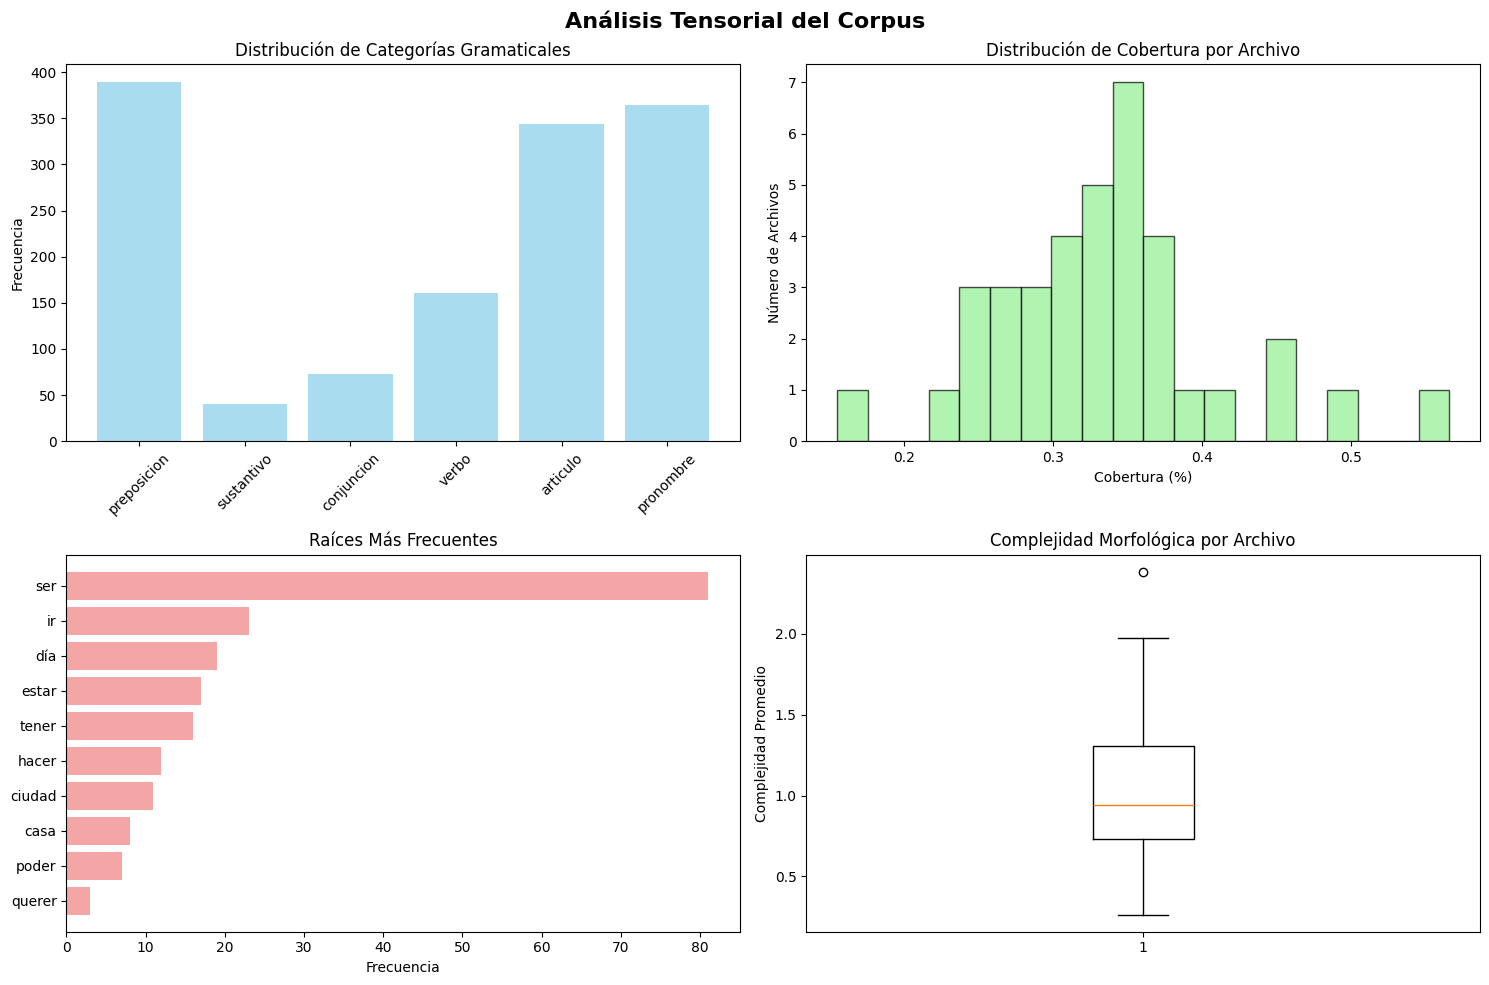

In [2]:
resultados, analizador = analizar_mi_corpus()

In [3]:
if resultados:
    print("✅ Análisis completado!")
    print(f"📊 Cobertura: {resultados['resumen']['cobertura_global']:.1%}")
    print(f"📁 Archivos procesados: {resultados['resumen']['archivos_procesados']}")

✅ Análisis completado!
📊 Cobertura: 33.5%
📁 Archivos procesados: 37


In [5]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
from typing import Dict, List, Tuple
import json
import re
from datetime import datetime

# Importar nuestro analizador tensorial (asumiendo que está disponible)
# Si no, incluimos una versión simplificada aquí

class AnalizadorCorpusTensorial:
    """
    Analizador completo de corpus usando el modelo tensorial.
    Procesa múltiples archivos y genera estadísticas comprensivas.
    """

    def __init__(self, ruta_corpus: str):
        self.ruta_corpus = ruta_corpus
        self.resultados_totales = {}
        self.estadisticas_globales = {}
        self.matriz_coocurrencia = defaultdict(lambda: defaultdict(int))

        # Base de datos morfológica expandida para análisis real
        self.planos = {
            'raiz': self._cargar_verbos_comunes(),
            'tiempo': ['presente', 'pasado', 'futuro', 'condicional', 'presente_perfecto', 'pasado_perfecto'],
            'persona': ['1sg', '2sg', '3sg', '1pl', '2pl', '3pl'],
            'modo': ['indicativo', 'subjuntivo', 'imperativo'],
            'aspecto': ['perfectivo', 'imperfectivo', 'progresivo'],
            'genero': ['masculino', 'femenino', 'neutro'],
            'numero': ['singular', 'plural'],
            'categoria': ['verbo', 'sustantivo', 'adjetivo', 'adverbio', 'preposicion', 'articulo', 'pronombre', 'conjuncion']
        }

        # Base de datos de palabras (ampliada para análisis real)
        self.palabras_conocidas = self._crear_base_datos_completa()
        self.indices = {plano: {elem: i for i, elem in enumerate(elementos)}
                       for plano, elementos in self.planos.items()}

    def _cargar_verbos_comunes(self):
        """Carga una lista extensa de verbos españoles comunes"""
        return [
            'ser', 'estar', 'tener', 'hacer', 'decir', 'ir', 'ver', 'dar', 'saber', 'querer',
            'llegar', 'pasar', 'deber', 'poner', 'parecer', 'quedar', 'creer', 'hablar', 'llevar',
            'dejar', 'seguir', 'encontrar', 'llamar', 'venir', 'pensar', 'salir', 'volver', 'tomar',
            'conocer', 'vivir', 'sentir', 'tratar', 'mirar', 'contar', 'empezar', 'esperar',
            'buscar', 'existir', 'entrar', 'trabajar', 'escribir', 'perder', 'producir', 'ocurrir',
            'permitir', 'aparecer', 'considerar', 'conseguir', 'comenzar', 'servir', 'sacar', 'necesitar',
            'mantener', 'resultar', 'leer', 'caer', 'cambiar', 'presentar', 'crear', 'abrir', 'considerar',
            'oír', 'acabar', 'convertir', 'ganar', 'formar', 'traer', 'partir', 'morir', 'aceptar',
            'realizar', 'suponer', 'comprender', 'lograr', 'explicar', 'preguntar', 'tocar', 'reconocer',
            'estudiar', 'alcanzar', 'nacer', 'dirigir', 'correr', 'utilizar', 'pagar', 'ayudar',
            'gustar', 'jugar', 'escuchar', 'cumplir', 'ofrecer', 'descubrir', 'levantar', 'intentar'
        ]

    def _crear_base_datos_completa(self):
        """Crea una base de datos más completa para análisis real del corpus"""
        palabras = {}

        # Verbos con conjugaciones más completas
        conjugaciones_verbos = {
            # SER
            'es': {'raiz': 'ser', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'son': {'raiz': 'ser', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'era': {'raiz': 'ser', 'tiempo': 'pasado', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'fueron': {'raiz': 'ser', 'tiempo': 'pasado', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'será': {'raiz': 'ser', 'tiempo': 'futuro', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'serán': {'raiz': 'ser', 'tiempo': 'futuro', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},

            # ESTAR
            'está': {'raiz': 'estar', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'están': {'raiz': 'estar', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'estaba': {'raiz': 'estar', 'tiempo': 'pasado', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'estaban': {'raiz': 'estar', 'tiempo': 'pasado', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'estará': {'raiz': 'estar', 'tiempo': 'futuro', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},

            # TENER
            'tiene': {'raiz': 'tener', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'tienen': {'raiz': 'tener', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'tenía': {'raiz': 'tener', 'tiempo': 'pasado', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'tenían': {'raiz': 'tener', 'tiempo': 'pasado', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'tendrá': {'raiz': 'tener', 'tiempo': 'futuro', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},

            # HACER
            'hace': {'raiz': 'hacer', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'hacen': {'raiz': 'hacer', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'hizo': {'raiz': 'hacer', 'tiempo': 'pasado', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'hicieron': {'raiz': 'hacer', 'tiempo': 'pasado', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},

            # DECIR
            'dice': {'raiz': 'decir', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'dicen': {'raiz': 'decir', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'dijo': {'raiz': 'decir', 'tiempo': 'pasado', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'dijeron': {'raiz': 'decir', 'tiempo': 'pasado', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},

            # IR
            'va': {'raiz': 'ir', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'van': {'raiz': 'ir', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'fue': {'raiz': 'ir', 'tiempo': 'pasado', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'fueron': {'raiz': 'ir', 'tiempo': 'pasado', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},

            # Más verbos comunes
            'puede': {'raiz': 'poder', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'pueden': {'raiz': 'poder', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'debe': {'raiz': 'deber', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'deben': {'raiz': 'deber', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
            'quiere': {'raiz': 'querer', 'tiempo': 'presente', 'persona': '3sg', 'modo': 'indicativo', 'categoria': 'verbo'},
            'quieren': {'raiz': 'querer', 'tiempo': 'presente', 'persona': '3pl', 'modo': 'indicativo', 'categoria': 'verbo'},
        }

        # Sustantivos con variaciones de género y número
        sustantivos = {
            # Familia 'niño'
            'niño': {'raiz': 'niño', 'genero': 'masculino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'niños': {'raiz': 'niño', 'genero': 'masculino', 'numero': 'plural', 'categoria': 'sustantivo'},
            'niña': {'raiz': 'niño', 'genero': 'femenino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'niñas': {'raiz': 'niño', 'genero': 'femenino', 'numero': 'plural', 'categoria': 'sustantivo'},

            # Familia 'casa'
            'casa': {'raiz': 'casa', 'genero': 'femenino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'casas': {'raiz': 'casa', 'genero': 'femenino', 'numero': 'plural', 'categoria': 'sustantivo'},

            # Más sustantivos
            'hombre': {'raiz': 'hombre', 'genero': 'masculino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'hombres': {'raiz': 'hombre', 'genero': 'masculino', 'numero': 'plural', 'categoria': 'sustantivo'},
            'mujer': {'raiz': 'mujer', 'genero': 'femenino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'mujeres': {'raiz': 'mujer', 'genero': 'femenino', 'numero': 'plural', 'categoria': 'sustantivo'},
            'país': {'raiz': 'país', 'genero': 'masculino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'países': {'raiz': 'país', 'genero': 'masculino', 'numero': 'plural', 'categoria': 'sustantivo'},
            'ciudad': {'raiz': 'ciudad', 'genero': 'femenino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'ciudades': {'raiz': 'ciudad', 'genero': 'femenino', 'numero': 'plural', 'categoria': 'sustantivo'},
            'año': {'raiz': 'año', 'genero': 'masculino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'años': {'raiz': 'año', 'genero': 'masculino', 'numero': 'plural', 'categoria': 'sustantivo'},
            'día': {'raiz': 'día', 'genero': 'masculino', 'numero': 'singular', 'categoria': 'sustantivo'},
            'días': {'raiz': 'día', 'genero': 'masculino', 'numero': 'plural', 'categoria': 'sustantivo'},
        }

        # Artículos y determinantes
        articulos = {
            'el': {'categoria': 'articulo', 'genero': 'masculino', 'numero': 'singular'},
            'la': {'categoria': 'articulo', 'genero': 'femenino', 'numero': 'singular'},
            'los': {'categoria': 'articulo', 'genero': 'masculino', 'numero': 'plural'},
            'las': {'categoria': 'articulo', 'genero': 'femenino', 'numero': 'plural'},
            'un': {'categoria': 'articulo', 'genero': 'masculino', 'numero': 'singular'},
            'una': {'categoria': 'articulo', 'genero': 'femenino', 'numero': 'singular'},
            'unos': {'categoria': 'articulo', 'genero': 'masculino', 'numero': 'plural'},
            'unas': {'categoria': 'articulo', 'genero': 'femenino', 'numero': 'plural'},
            'este': {'categoria': 'articulo', 'genero': 'masculino', 'numero': 'singular'},
            'esta': {'categoria': 'articulo', 'genero': 'femenino', 'numero': 'singular'},
            'estos': {'categoria': 'articulo', 'genero': 'masculino', 'numero': 'plural'},
            'estas': {'categoria': 'articulo', 'genero': 'femenino', 'numero': 'plural'},
        }

        # Preposiciones y conectores
        funcionales = {
            'de': {'categoria': 'preposicion'},
            'en': {'categoria': 'preposicion'},
            'con': {'categoria': 'preposicion'},
            'por': {'categoria': 'preposicion'},
            'para': {'categoria': 'preposicion'},
            'sin': {'categoria': 'preposicion'},
            'sobre': {'categoria': 'preposicion'},
            'entre': {'categoria': 'preposicion'},
            'hacia': {'categoria': 'preposicion'},
            'desde': {'categoria': 'preposicion'},
            'hasta': {'categoria': 'preposicion'},
            'y': {'categoria': 'conjuncion'},
            'o': {'categoria': 'conjuncion'},
            'pero': {'categoria': 'conjuncion'},
            'que': {'categoria': 'pronombre'},
            'se': {'categoria': 'pronombre'},
            'le': {'categoria': 'pronombre'},
            'lo': {'categoria': 'pronombre'},
            'me': {'categoria': 'pronombre'},
            'te': {'categoria': 'pronombre'},
            'nos': {'categoria': 'pronombre'},
        }

        # Combinar todas las categorías
        palabras.update(conjugaciones_verbos)
        palabras.update(sustantivos)
        palabras.update(articulos)
        palabras.update(funcionales)

        return palabras

    def listar_archivos(self) -> List[str]:
        """Lista todos los archivos de texto en el directorio del corpus"""
        if not os.path.exists(self.ruta_corpus):
            print(f"❌ ERROR: La ruta {self.ruta_corpus} no existe.")
            print("🔧 SOLUCIÓN: Monta tu Google Drive primero:")
            print("   from google.colab import drive")
            print("   drive.mount('/content/drive')")
            return []

        # Buscar archivos de texto
        patrones = ['*.txt', '*.csv', '*.json']
        archivos = []

        for patron in patrones:
            ruta_patron = os.path.join(self.ruta_corpus, patron)
            archivos.extend(glob.glob(ruta_patron))

        # También buscar en subdirectorios
        for root, dirs, files in os.walk(self.ruta_corpus):
            for file in files:
                if file.endswith(('.txt', '.csv', '.json')):
                    archivos.append(os.path.join(root, file))

        archivos = list(set(archivos))  # Eliminar duplicados
        print(f"📁 Encontrados {len(archivos)} archivos en el corpus")

        return archivos

    def leer_archivo(self, ruta_archivo: str) -> str:
        """Lee el contenido de un archivo"""
        try:
            with open(ruta_archivo, 'r', encoding='utf-8') as f:
                contenido = f.read()
            return contenido
        except Exception as e:
            print(f"⚠️  Error leyendo {ruta_archivo}: {e}")
            return ""

    def procesar_archivo(self, ruta_archivo: str) -> Dict:
        """Procesa un archivo individual usando análisis tensorial"""
        print(f"📄 Procesando: {os.path.basename(ruta_archivo)}")

        contenido = self.leer_archivo(ruta_archivo)
        if not contenido:
            return {'error': 'No se pudo leer el archivo'}

        # Preprocesar texto
        texto_limpio = self.limpiar_texto(contenido)
        tokens = texto_limpio.split()

        # Analizar cada token
        palabras_analizadas = []
        palabras_reconocidas = 0

        for token in tokens:
            analisis = self.analizar_palabra(token)
            palabras_analizadas.append(analisis)
            if analisis['reconocida']:
                palabras_reconocidas += 1

        # Calcular estadísticas del archivo
        estadisticas = self._calcular_estadisticas_archivo(palabras_analizadas)
        patrones = self._identificar_patrones_archivo(palabras_analizadas)
        complejidad = self._calcular_complejidad_archivo(palabras_analizadas)

        resultado = {
            'archivo': os.path.basename(ruta_archivo),
            'ruta_completa': ruta_archivo,
            'total_tokens': len(tokens),
            'tokens_reconocidos': palabras_reconocidas,
            'cobertura': palabras_reconocidas / len(tokens) if tokens else 0,
            'estadisticas': estadisticas,
            'patrones': patrones,
            'complejidad': complejidad,
            'palabras_analizadas': palabras_analizadas
        }

        return resultado

    def limpiar_texto(self, texto: str) -> str:
        """Limpia y normaliza el texto"""
        # Convertir a minúsculas
        texto = texto.lower()
        # Remover caracteres especiales pero mantener espacios
        texto = re.sub(r'[^\w\s]', ' ', texto)
        # Normalizar espacios
        texto = re.sub(r'\s+', ' ', texto)
        return texto.strip()

    def analizar_palabra(self, palabra: str) -> Dict:
        """Analiza una palabra usando el modelo tensorial"""
        if palabra in self.palabras_conocidas:
            componentes = self.palabras_conocidas[palabra]

            # Convertir a coordenadas tensoriales
            coordenadas = {}
            for plano, valor in componentes.items():
                if plano in self.indices and valor in self.indices[plano]:
                    coordenadas[plano] = self.indices[plano][valor]

            return {
                'palabra': palabra,
                'reconocida': True,
                'componentes': componentes,
                'coordenadas': coordenadas,
                'codigo_tensorial': hash(str(sorted(coordenadas.items())))
            }
        else:
            return {
                'palabra': palabra,
                'reconocida': False,
                'componentes': {},
                'coordenadas': {},
                'codigo_tensorial': None
            }

    def _calcular_estadisticas_archivo(self, palabras_analizadas: List[Dict]) -> Dict:
        """Calcula estadísticas tensoriales de un archivo"""
        stats = {
            'distribucion_categorias': Counter(),
            'distribucion_tiempos': Counter(),
            'distribucion_personas': Counter(),
            'distribucion_generos': Counter(),
            'distribucion_numeros': Counter(),
            'raices_frecuentes': Counter(),
            'familias_morfologicas': defaultdict(list)
        }

        for analisis in palabras_analizadas:
            if analisis['reconocida']:
                comp = analisis['componentes']

                # Contar distribuciones
                for caracteristica in ['categoria', 'tiempo', 'persona', 'genero', 'numero']:
                    if caracteristica in comp:
                        stats[f'distribucion_{caracteristica}s'][comp[caracteristica]] += 1

                # Raíces frecuentes
                if 'raiz' in comp:
                    stats['raices_frecuentes'][comp['raiz']] += 1
                    stats['familias_morfologicas'][comp['raiz']].append(analisis['palabra'])

        return stats

    def _identificar_patrones_archivo(self, palabras_analizadas: List[Dict]) -> Dict:
        """Identifica patrones tensoriales en el archivo"""
        patrones = {
            'transformaciones_detectadas': [],
            'clusters_semanticos': defaultdict(list),
            'secuencias_gramaticales': []
        }

        # Agrupar por raíz para detectar transformaciones
        familias = defaultdict(list)
        for analisis in palabras_analizadas:
            if analisis['reconocida'] and 'raiz' in analisis['componentes']:
                raiz = analisis['componentes']['raiz']
                familias[raiz].append(analisis)

        # Detectar transformaciones sistemáticas
        for raiz, formas in familias.items():
            if len(formas) > 1:
                transformacion = {
                    'raiz': raiz,
                    'formas_detectadas': [f['palabra'] for f in formas],
                    'variaciones': {}
                }

                # Analizar qué varía entre las formas
                for caracteristica in ['tiempo', 'persona', 'genero', 'numero']:
                    valores = [f['componentes'].get(caracteristica) for f in formas if caracteristica in f['componentes']]
                    if len(set(valores)) > 1:  # Si hay variación
                        transformacion['variaciones'][caracteristica] = list(set(valores))

                patrones['transformaciones_detectadas'].append(transformacion)

        return patrones

    def _calcular_complejidad_archivo(self, palabras_analizadas: List[Dict]) -> Dict:
        """Calcula métricas de complejidad morfológica del archivo"""
        palabras_reconocidas = [p for p in palabras_analizadas if p['reconocida']]

        if not palabras_reconocidas:
            return {'complejidad_promedio': 0, 'diversidad_morfologica': 0}

        complejidades = []
        rasgos_unicos = set()

        for analisis in palabras_reconocidas:
            comp = analisis['componentes']
            complejidad_palabra = len([v for k, v in comp.items() if k != 'categoria'])
            complejidades.append(complejidad_palabra)

            # Contar rasgos únicos
            for caracteristica, valor in comp.items():
                if caracteristica != 'categoria':
                    rasgos_unicos.add(f"{caracteristica}:{valor}")

        return {
            'complejidad_promedio': np.mean(complejidades) if complejidades else 0,
            'complejidad_maxima': max(complejidades) if complejidades else 0,
            'diversidad_morfologica': len(rasgos_unicos),
            'distribucion_complejidad': Counter(complejidades)
        }

    def procesar_corpus_completo(self) -> Dict:
        """
        FUNCIÓN PRINCIPAL: Procesa todo el corpus y genera análisis completo
        """
        print("🚀 INICIANDO ANÁLISIS COMPLETO DEL CORPUS")
        print("="*80)

        archivos = self.listar_archivos()
        if not archivos:
            return {'error': 'No se encontraron archivos para procesar'}

        resultados_archivos = []
        estadisticas_globales = {
            'total_archivos': len(archivos),
            'total_tokens': 0,
            'total_reconocidos': 0,
            'distribucion_categorias_global': Counter(),
            'raices_mas_frecuentes_global': Counter(),
            'familias_morfologicas_global': defaultdict(set),
            'archivos_procesados': 0,
            'archivos_con_error': 0
        }

        # Procesar cada archivo
        for i, archivo in enumerate(archivos, 1):
            print(f"\n📁 Archivo {i}/{len(archivos)}: {os.path.basename(archivo)}")

            try:
                resultado = self.procesar_archivo(archivo)

                if 'error' not in resultado:
                    resultados_archivos.append(resultado)
                    estadisticas_globales['archivos_procesados'] += 1

                    # Acumular estadísticas globales
                    estadisticas_globales['total_tokens'] += resultado['total_tokens']
                    estadisticas_globales['total_reconocidos'] += resultado['tokens_reconocidos']

                    # Acumular distribuciones
                    for cat, count in resultado['estadisticas']['distribucion_categorias'].items():
                        estadisticas_globales['distribucion_categorias_global'][cat] += count

                    for raiz, count in resultado['estadisticas']['raices_frecuentes'].items():
                        estadisticas_globales['raices_mas_frecuentes_global'][raiz] += count

                    # Acumular familias morfológicas
                    for raiz, formas in resultado['estadisticas']['familias_morfologicas'].items():
                        estadisticas_globales['familias_morfologicas_global'][raiz].update(formas)

                    print(f"   ✅ Procesado: {resultado['total_tokens']} tokens, {resultado['cobertura']:.1%} reconocidos")

                else:
                    estadisticas_globales['archivos_con_error'] += 1
                    print(f"   ❌ Error: {resultado['error']}")

            except Exception as e:
                estadisticas_globales['archivos_con_error'] += 1
                print(f"   💥 Error crítico: {e}")

        # Calcular métricas globales
        cobertura_global = (estadisticas_globales['total_reconocidos'] /
                           estadisticas_globales['total_tokens']) if estadisticas_globales['total_tokens'] > 0 else 0

        estadisticas_globales['cobertura_global'] = cobertura_global

        resultado_final = {
            'timestamp': datetime.now().isoformat(),
            'corpus_path': self.ruta_corpus,
            'resumen': estadisticas_globales,
            'resultados_por_archivo': resultados_archivos,
            'analisis_global': self._generar_analisis_global(estadisticas_globales, resultados_archivos)
        }

        return resultado_final

    def _generar_analisis_global(self, stats_globales: Dict, resultados_archivos: List[Dict]) -> Dict:
        """Genera análisis de patrones globales del corpus"""
        analisis = {
            'patrones_morfologicos_dominantes': {},
            'diversidad_lexical': 0,
            'complejidad_morfologica_promedio': 0,
            'distribucion_complejidad_archivos': [],
            'familias_morfologicas_mas_ricas': {}
        }

        # Patrones morfológicos dominantes
        if stats_globales['distribucion_categorias_global']:
            total_palabras = sum(stats_globales['distribucion_categorias_global'].values())
            analisis['patrones_morfologicos_dominantes'] = {
                cat: {'frecuencia': count, 'porcentaje': count/total_palabras*100}
                for cat, count in stats_globales['distribucion_categorias_global'].most_common()
            }

        # Diversidad léxical
        analisis['diversidad_lexical'] = len(stats_globales['raices_mas_frecuentes_global'])

        # Complejidad morfológica promedio global
        complejidades_todos_archivos = []
        for resultado in resultados_archivos:
            if 'complejidad' in resultado and 'complejidad_promedio' in resultado['complejidad']:
                complejidades_todos_archivos.append(resultado['complejidad']['complejidad_promedio'])

        analisis['complejidad_morfologica_promedio'] = np.mean(complejidades_todos_archivos) if complejidades_todos_archivos else 0

        # Distribución de complejidad por archivo
        analisis['distribucion_complejidad_archivos'] = [
            {'archivo': r['archivo'], 'complejidad_promedio': r['complejidad']['complejidad_promedio']}
            for r in resultados_archivos if 'complejidad' in r and 'complejidad_promedio' in r['complejidad']
        ]

        # Familias morfológicas más ricas (con más variaciones)
        familias_ordenadas = sorted(stats_globales['familias_morfologicas_global'].items(),
                                   key=lambda item: len(item[1]), reverse=True)

        analisis['familias_morfologicas_mas_ricas'] = {
            raiz: {'numero_formas': len(formas), 'formas': list(formas)}
            for raiz, formas in familias_ordenadas[:10] # Top 10
        }


        return analisis